#  EMF RBM Energy Landscapes

Comparison of Entropy and Energetics Contributions to RBM Free Energy


- use the TAP S and MF Energy *U_naive   
    - which takes an equlibration step first  
    - S(mv, mh), U_naive(mv, mh)
    
- use a simple h = means_hiddens() step
    - S(v, h), E_MF(v, h)


In [1]:
import numpy as np
import h5py

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import linear_model, datasets, metrics, preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

import psutil

### Helper methods for simple case

In [2]:
from sklearn.utils.fixes import expit    
from sklearn.utils.extmath import safe_sparse_dot

def sig_means(x, b, W):
    a = safe_sparse_dot(x, W.T) + b
    return expit(a, out=a)

In [3]:
import emf_rbm

In [4]:
import rbm_datasets

### binarized Omniglot

In [5]:
train_x, train_t, train_char, test_x, test_t, test_char = rbm_datasets.load_omniglot_iwae()
print train_x.shape, train_t.shape
print "there are ",np.unique(train_char).shape, " classes"

(24345, 784) (24345,)
there are  (55,)  classes


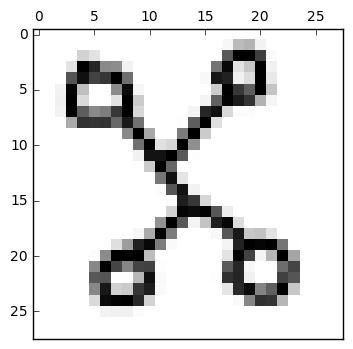

In [6]:
image = train_x[0,:]
image = np.reshape(image,[28,28])
rbm_datasets.show_image(image)

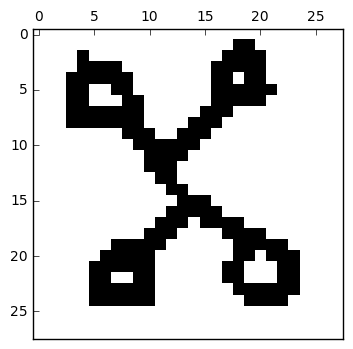

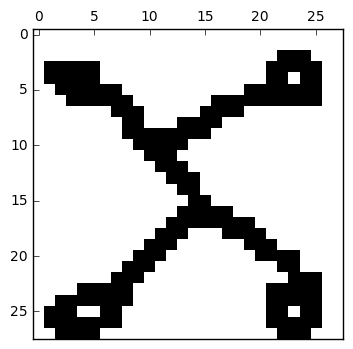

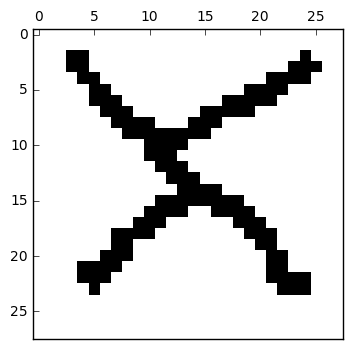

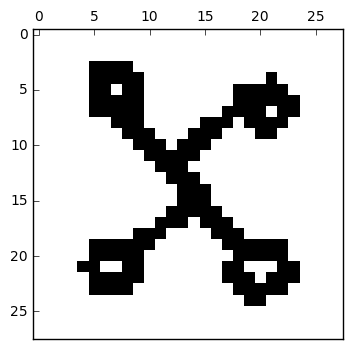

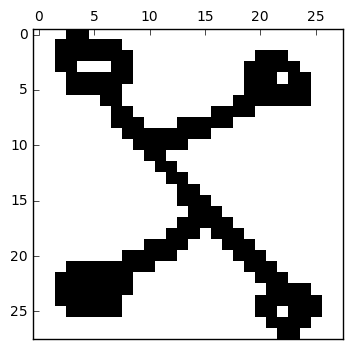

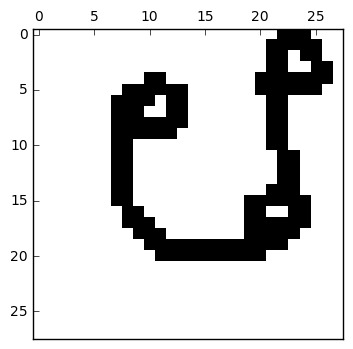

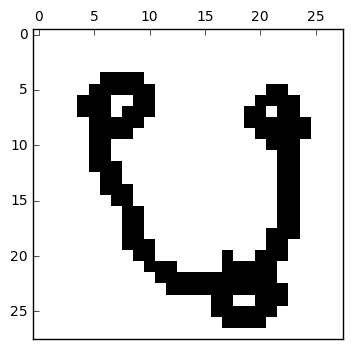

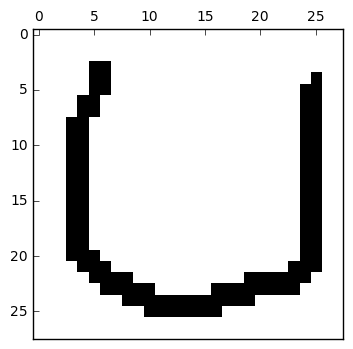

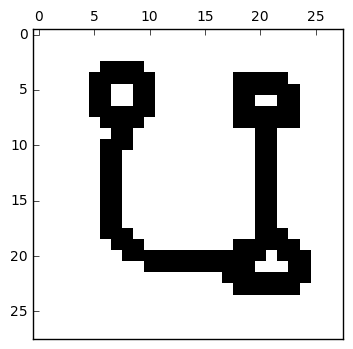

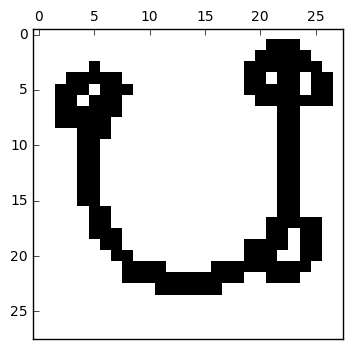

In [7]:
from sklearn.preprocessing import binarize
BX_train = binarize(train_x, threshold=0.2)
for i in range(10):
    image = BX_train[i,:]
    image = np.reshape(image,[28,28])
    rbm_datasets.show_image(image)

In [ ]:
X = BX_train

In [ ]:
emf_rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True)
emf_rbm.fit(X)

[EMF_RBM] Iteration 1, pseudo-likelihood = -217.07, time = 9.46s
computing TAP Free Energies
monitor:  -276.155397799 385.089327773 108.939002945
[EMF_RBM] Iteration 2, pseudo-likelihood = -212.41, time = 22.44s
computing TAP Free Energies
monitor:  -275.816367219 385.030201504 109.220775216


In [ ]:
emf_rbm.entropies

In [ ]:
plt.hist(Emf[19],100, alpha=0.25);
plt.title("final U energies")

So ... what is the best interepretation ?

### Lets look at the mean Entropy, Energy, and Free Energy

In [ ]:
emf_rbm = EMF_RBM(verbose=True, monitor=True)
emf_rbm= emf_rbm.fit(X)

In [ ]:
plt.plot(emf_rbm.entropies-emf_rbm.entropies[0], color='red')
plt.plot(emf_rbm.mean_field_energies-emf_rbm.mean_field_energies[0], color='blue')
plt.plot(emf_rbm.free_energies-emf_rbm.free_energies[0], color='green')

### Random Data

In [ ]:
noise = np.random.normal(size=X.shape)

In [ ]:
N = X+noise;

In [ ]:
v = N[0,:]
show_image(np.reshape(v,[28,28]))

###  not really binarized but it should be

In [ ]:
emf_rbm = EMF_RBM(verbose=True, monitor=True)
emf_rbm= emf_rbm.fit(N)

In [ ]:
plt.plot(emf_rbm.entropies-emf_rbm.entropies[0], color='red')
plt.plot(emf_rbm.mean_field_energies-emf_rbm.mean_field_energies[0], color='blue')
plt.plot(emf_rbm.free_energies-emf_rbm.free_energies[0], color='green')